In [85]:
%matplotlib inline

In [86]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [87]:
import scipy as sp
from scipy import stats

In [88]:
import csv

In [89]:
matplotlib.style.use('classic')

### データの読み込み

In [90]:
with open('../datasets/davis.csv','r') as f:
    data = [k for k in csv.reader(f)]

###  必要なデータの抽出 (体重と身長)

In [91]:
data_list = np.asarray([(float(x[2]), float(x[3])) for x in data[1:]])

### データの散布図の描画

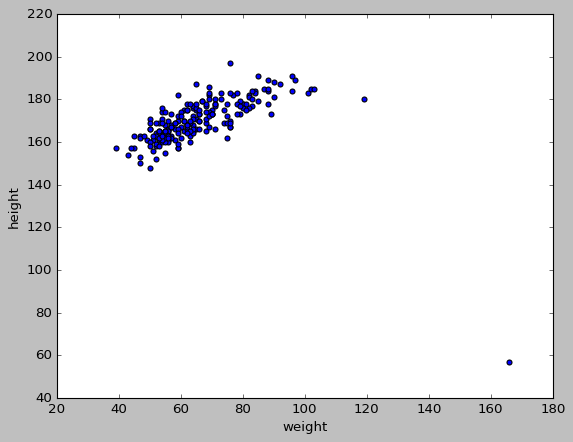

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data_list[:, 0], data_list[:, 1])
ax.set_xlabel("weight")
ax.set_ylabel("height")

### パラメーター推定

#### パラメーターμの計算

In [93]:
param_mu = np.mean(data_list, axis = 0)

#### パラメーターΣの計算

In [94]:
dim = len(data_list[0])
param_sigma = np.zeros((dim, dim)) 
for each_data in data_list:
    each_var = (each_data- param_mu)[:, np.newaxis]
    each_sigma = np.dot(each_var, each_var.T)
    param_sigma += each_sigma
param_sigma = param_sigma / len(data_list)

### 異常度の計算

In [95]:
# sigmaの逆行列を計算
inv_sigma = np.linalg.inv(param_sigma)
anomaly_list = []

for each_data in data_list:
    each_var = (each_data - param_mu)[:, np.newaxis]
    each_a = np.dot(np.dot(each_var.T, inv_sigma), each_var)
    anomaly_list.append(each_a)

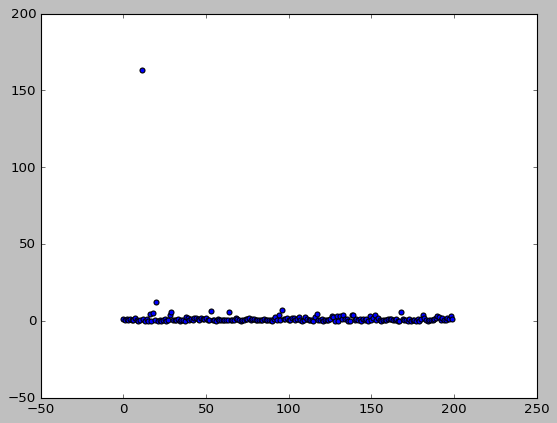

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(np.arange(len(anomaly_list)), anomaly_list)
plt.show()

### 異常度の確率分布
自由度M, スケール因子1のカイ2乗分布(Mはデータの次元数)

scipy.stats.chi2.pdf(y, df, scale)について、dfが自由度、scaleがスケール因子に相当

In [97]:
y = np.linspace(0, 45, 100)
chi_fitted = stats.chi2.pdf(y, df=2, scale=1)

In [98]:
anomaly_list = list(np.asarray(anomaly_list).flatten())

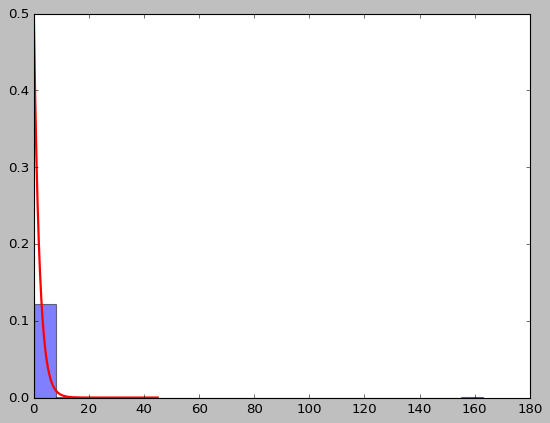

In [99]:
plt.figure(1)
plt.clf()
plt.plot(y, chi_fitted, 'r-', lw=2, label='norm fitted')
plt.hist(anomaly_list, normed = 1, bins=20, alpha=0.5)
plt.show()

### 閾値を設定(1%基準)

In [100]:
thres = stats.chi2.isf(q=0.01, df=2, scale=1)
print(thres)

9.21034037198


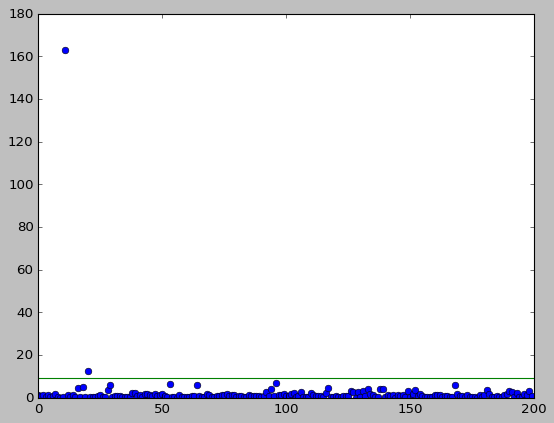

In [101]:
x = np.linspace(0, 200, 100)
y = [thres for elem in x]
plt.figure()
plt.plot(np.arange(len(anomaly_list)), anomaly_list, 'o')
plt.plot(x, y)